In [1]:
import sys
import os
sys.path.append("../..")
from diachr import DiachromaticInteractionSet
from diachr import ReadTypeAndConfigCounter

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'read_type_and_configuration_frequencies_results'
%mkdir -p $NOTEBOOK_RESULTS_DIR

# Read type and configuration frequencies

In this notebook, we determine the frequencies of the four types of mapped paired-end reads and the ten configurations across interactions of an interaction file generated with `UICer.py`, i.e., the interactions have already been classified as balanced or unbalanced. In order to keep the layout clear we have outsourced functions for counting and plotting to a separate module.

In [2]:
rtac_Counter = ReadTypeAndConfigCounter()

## Loading interaction data

We generated interaction files for Hi-C and cpature Hi-C data on the 17 hematopoietic cell types using `UICer` and placed them in a directory named `diachrscripts/UICer_interactions`.

### Download interaction file for Mifsud data

 In addition, we provide a corresponding interaction file for download, which we have prepared for capture Hi-C data from the publication by [Mifsud et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/25938943/).

In [3]:
!mkdir -p ../../UICer_interactions/CHC
!wget -O ../../UICer_interactions/CHC/MIF_GM12878_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz https://www.genecascade.org/downloads/diachrscripts/MIF_REPC_evaluated_and_categorized_interactions.tsv.gz

--2022-11-04 09:29:46--  https://www.genecascade.org/downloads/diachrscripts/MIF_REPC_evaluated_and_categorized_interactions.tsv.gz
Resolving www.genecascade.org (www.genecascade.org)... 193.175.174.14
Connecting to www.genecascade.org (www.genecascade.org)|193.175.174.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70203503 (67M) [application/x-gzip]
Saving to: ‘../../UICer_interactions/CHC/MIF_GM12878_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz’

../../UICer_interac 100%[===================>]  66.95M  6.89MB/s    in 9.8s    

2022-11-04 09:29:56 (6.86 MB/s) - ‘../../UICer_interactions/CHC/MIF_GM12878_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz’ saved [70203503/70203503]



### Choose a file

In [4]:
AUTHOR = 'SCH' # JAV, SCH, MIF ot MON
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_SHORT = 'MESC' # MK, ERY, NEU, MON, MAC_M0, ..., , MESC, GM12878, CM, IPSC
OUT_PREFIX = AUTHOR + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
INTERACTION_FILE = '../../UICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz' 

### Read interactions into data structure

In [5]:
# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../UICer_interactions/CHC/SCH_MESC_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Set size: 992,329
[INFO] ... done.


## Frequencies of the for types of mapped paired-end reads

In paired-end sequencing, four types read pairs can be distinguished after mapping:

1. The reads are mapped onto different strands and point to each other (Type `0`)
2. The reads are mapped onto different strands and point away from each other (Type `1`)
3. The reads both are mapped to the forward strand (Type `2`)
4. The reads both are mapped to the reverse strand (Type `3`)

Here we determine the frequencies of the four types across all interactions as well as across all unbalanced and balanced interactions.

### Count reads separately by type

In [6]:
RP_TYPE_FREQ_DICT, RP_TYPE_DENS_DICT = rtac_Counter.count_read_types(d11_interaction_set)

### Output frequencies as a table

In [7]:
rtac_Counter.print_read_type_frequency_tables(
    rp_type_freq_dict = RP_TYPE_FREQ_DICT,
    rp_type_dens_dict = RP_TYPE_DENS_DICT,
    i_cats = ['U','B','ALL'],
    print_dens=True)

U
		T0	T1	T2	T3
	NN: 	0.26	0.25	0.25	0.24
	EE: 	0.26	0.23	0.26	0.25
	NE: 	0.25	0.25	0.25	0.25
	EN: 	0.28	0.22	0.27	0.23
	ALL: 	0.26	0.24	0.26	0.24

B
		T0	T1	T2	T3
	NN: 	0.25	0.25	0.24	0.25
	EE: 	0.25	0.24	0.26	0.25
	NE: 	0.25	0.25	0.25	0.25
	EN: 	0.26	0.24	0.26	0.24
	ALL: 	0.25	0.25	0.25	0.25

ALL
		T0	T1	T2	T3
	NN: 	0.26	0.25	0.25	0.25
	EE: 	0.25	0.24	0.26	0.25
	NE: 	0.25	0.25	0.25	0.25
	EN: 	0.26	0.24	0.26	0.24
	ALL: 	0.26	0.24	0.26	0.24



### Output frequencies as a bar chart

Use `NN`, `NE`, `EN` or `EE` to plot the frequencies of specific enrichment categories. Use `ALL` to plot the frequencies across all enrichment categories.

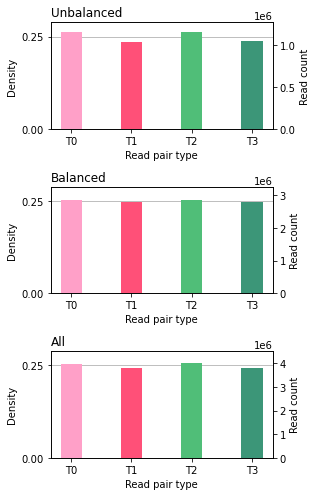

In [8]:
fig = rtac_Counter.create_read_type_frequency_bar_charts(
    rp_type_freq_dict = RP_TYPE_FREQ_DICT,
    rp_type_dens_dict = RP_TYPE_DENS_DICT,
    i_cats = ['U','B','ALL'],
    e_cat = 'ALL',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_rp_type_frequency_bar_charts.pdf')

## Frequencies of configurations

We distinguish ten configurations of interactions (`0X`, `1X`, `2X`, `3X`, `01`, `02`, `03`, `12`, `13`, `23`), depending on which of the four types of mapped paired-end reads predominate within individual interactions.

### Count interactions separately by configuration

In [9]:
CONF_FREQ_DICT, CONF_DENS_DICT = rtac_Counter.count_configurations(d11_interaction_set)

### Output frequencies as a table

In [10]:
rtac_Counter.print_configuration_frequency_tables(
    conf_freq_dict = CONF_FREQ_DICT,
    conf_dens_dict = CONF_DENS_DICT,
    i_cats = ['U', 'B', 'ALL'])

U
		NN		EE		NE		EN		ALL
	0X: 	94 (0.05)	489 (0.02)	3,690 (0.03)	4,219 (0.04)	8,492 (0.03)
	1X: 	78 (0.04)	406 (0.02)	3,803 (0.03)	3,355 (0.03)	7,642 (0.03)
	2X: 	84 (0.04)	461 (0.02)	3,846 (0.03)	4,066 (0.04)	8,457 (0.03)
	3X: 	79 (0.04)	512 (0.03)	3,708 (0.03)	3,427 (0.03)	7,726 (0.03)
	01: 	11 (0.01)	189 (0.01)	624 (0.01)	611 (0.01)	1,435 (0.01)
	02: 	474 (0.23)	5,080 (0.25)	7,174 (0.06)	47,843 (0.41)	60,571 (0.24)
	03: 	383 (0.19)	4,538 (0.22)	41,789 (0.36)	7,162 (0.06)	53,872 (0.21)
	12: 	406 (0.20)	4,340 (0.21)	43,224 (0.37)	7,014 (0.06)	54,984 (0.22)
	13: 	443 (0.22)	4,135 (0.20)	7,160 (0.06)	37,102 (0.32)	48,840 (0.19)
	23: 	6 (0.00)	225 (0.01)	557 (0.00)	606 (0.01)	1,394 (0.01)
B
		NN		EE		NE		EN		ALL
	0X: 	16 (0.00)	90 (0.00)	541 (0.00)	610 (0.00)	1,257 (0.00)
	1X: 	11 (0.00)	76 (0.00)	595 (0.00)	554 (0.00)	1,236 (0.00)
	2X: 	13 (0.00)	91 (0.00)	547 (0.00)	600 (0.00)	1,251 (0.00)
	3X: 	11 (0.00)	68 (0.00)	564 (0.00)	542 (0.00)	1,185 (0.00)
	01: 	1,059 (0.15)	10,833 (0.14)	51,3

### Output frequencies as a bar chart

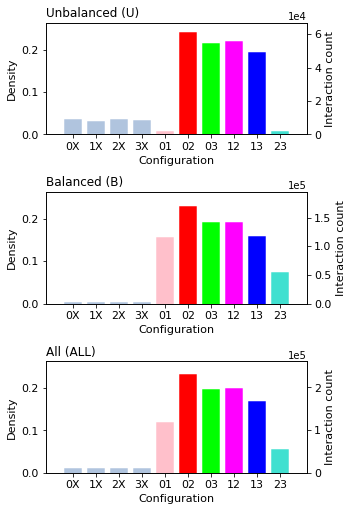

In [11]:
# Use this method for Hi-C datasets
fig = rtac_Counter.create_configuration_frequency_bar_charts(
    i_cats = ['U', 'B', 'ALL'],
    conf_freq_dict = CONF_FREQ_DICT,
    e_cat_1 = 'ALL',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_configuration_frequency_bar_charts.pdf')

### Output frequencies as a bar chart with two bars for each configuration

For capture Hi-C data, we can distinguish interactions by enrichment states, i.e., whether interaction go from the baited digest towards 5' (`NE`) or 3' (`EN`) direction.

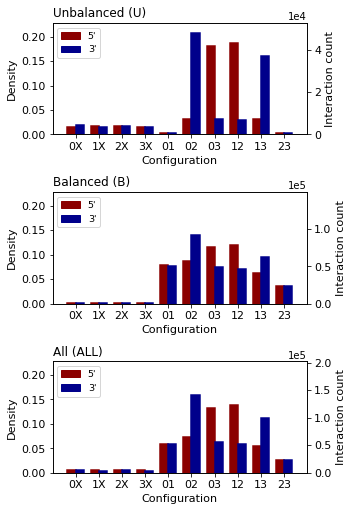

In [12]:
# Use this for CHC data
fig = rtac_Counter.create_configuration_frequency_bar_charts_2(
    conf_freq_dict = CONF_FREQ_DICT,
    i_cats = ['U', 'B', 'ALL'],
    e_cat_1 = 'NE',
    e_cat_2 = 'EN',
    e_cat_1_color = 'darkred',
    e_cat_2_color = 'darkblue',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_configuration_frequency_bar_charts_2.pdf'
    )